# Problem Statement:
X Education sells online courses to industry professionals. X Education needs help in selecting the
most promising leads, i.e., the leads that are most likely to convert into paying customers.
The company needs a model wherein you a lead score is assigned to each of the leads such that the
customers with higher lead score have a higher conversion chance and the customers with lower
lead score have a lower conversion chance.
The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).



# Goals of the Case Study
There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# Step 1: Importing the libraries & Data

In [ ]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [ ]:
#Reading the data file using pandas
df = pd.read_csv('Leads.csv')

# Step 2: Inspecting the Dataframe

In [ ]:
# Let's see the head of our dataset
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


We can see some of the columns(ex : Lead Profile, City) are having value as "Select" which is not required will remove work on this in upcoming steps.

In [ ]:
# Let's check the dimensions of the dataframe
df.shape

(9240, 37)

In [ ]:
# let's look at the statistical aspects of the dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
# Now we can check the duplicates on Prospect ID & Lead Number to confirm all are unique values.
df.duplicated(subset = 'Prospect ID').sum()

0

In [ ]:
df.duplicated(subset = 'Lead Number').sum()

0

In [ ]:
# Dropping Lead Number and Prospect ID since they have all unique values

df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

# Step 3: Data Preparation

Data Cleaning & Treatment:

In [ ]:
# Converting 'Select' values to NaN. Since it means no option is selected

df = df.replace('Select', np.nan)

In [ ]:
# Checking the unique values count in each columns of df
df.nunique().sort_values(ascending = True)

Update me on Supply Chain Content                   1
I agree to pay the amount through cheque            1
Magazine                                            1
Receive More Updates About Our Courses              1
Get updates on DM Content                           1
A free copy of Mastering The Interview              2
Newspaper Article                                   2
Search                                              2
Through Recommendations                             2
X Education Forums                                  2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
Newspaper                                           2
Digital Advertisement                               2
Asymmetrique Activity Index                         3
What matters most to you in choosing a course       3
Asymmetrique Profile Index                          3
Lead Quality                

In [ ]:
# Lets check the columns having only one unique value
df[['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content']].value_counts()

Magazine  Receive More Updates About Our Courses  I agree to pay the amount through cheque  Get updates on DM Content  Update me on Supply Chain Content
No        No                                      No                                        No                         No                                   9240
dtype: int64

In [ ]:
# Drop the columns which is not useful
columns_to_drop = ['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content']
df = df.drop(columns=columns_to_drop)

In [ ]:
# Creating a function to find null values

def null_values(data_frame):
  return round((data_frame.isnull().sum()*100/len(data_frame)).sort_values(ascending = False),2)

In [ ]:
# Cheching the nul values in dataframe

null_values(df)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
A free copy of Mastering The Interview            0.00
Lead Origi

In [ ]:
# Lets check the colunms having more nulls

df['How did you hear about X Education'].value_counts(dropna=False)

NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [ ]:
df['Lead Profile'].value_counts(dropna=False)

NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [ ]:
df['Lead Quality'].value_counts(dropna=False)

NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [ ]:
# Dropping cols with more than 45% missing values

drop_cols=df.columns

for i in drop_cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, 1, inplace = True)

In [ ]:
# Cheching the nul values in dataframe

null_values(df)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Lead Origin                                       0.00
Newspaper Article                                 0.00
Search                                            0.00
Total Time

In [ ]:
#checking value counts of "City" column

df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Around 60% of the City values are Mumbai. We can impute 'Mumbai' in the missing values.

In [ ]:
# Relpacing the NaN values with "Mumbai"

df['City'] = df['City'].fillna('Mumbai')

In [ ]:
#City columnn after replacing NaN values

df['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [ ]:
# Checking value counts of Specialization column

df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [ ]:
# We will replace NaN values in Specialization column with 'not provided'

df['Specialization'] = df['Specialization'].replace(np.nan, 'not provided')

In [ ]:
# Specialization columnn after replacing NaN values

df['Specialization'].value_counts(dropna=False)

not provided                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

We can see in the above all the management Specializations are showing similar trends between them. So we can combine this in to one value as Management Specializations.

In [ ]:
# Combining Management Specializations because they show similar trends

df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management',
                                                    'IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management',
                                                    'Retail Management'] ,'Management_Specializations')

In [ ]:
# Specialization columnn after converting

df['Specialization'].value_counts(dropna=False)

Management_Specializations           4253
not provided                         3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [ ]:
# Next will look into the value counts of Tag variable
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

As we can see from the above the values are quite relevant. So will replace the NaN values with "Not Provided.

In [ ]:
#replacing Nan values with "not provided"

df['Tags'] = df['Tags'].replace(np.nan,'not provided')

In [ ]:
# Check the next column 'What matters most to you in choosing a course'

df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Since most of the data falls under "Better Career Prospects" we cannot infer any conclusion from this, so we can drop this column.


In [ ]:
# Drop the column

df = df.drop('What matters most to you in choosing a course', axis=1)

In [ ]:
# Checking the column 'What is your current occupation'

df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [ ]:
# Replacing the Nan values with mode "Unemployed"

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

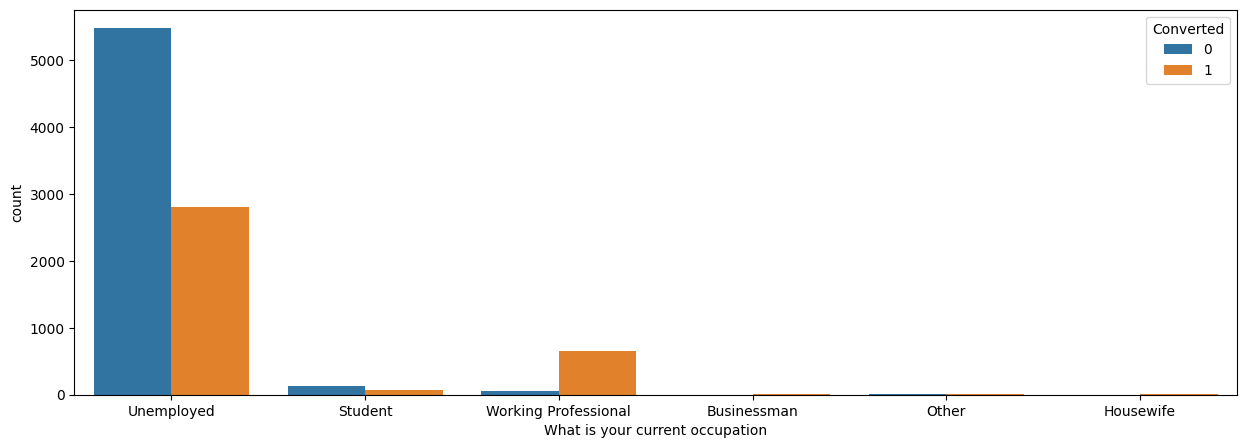

In [ ]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
sns.countplot(x=df['What is your current occupation'], y= None, hue=df.Converted)
plt.show()


Working Professionals going for the course have high chances of joining it.

Unemployed leads are the most in terms of Absolute numbers.

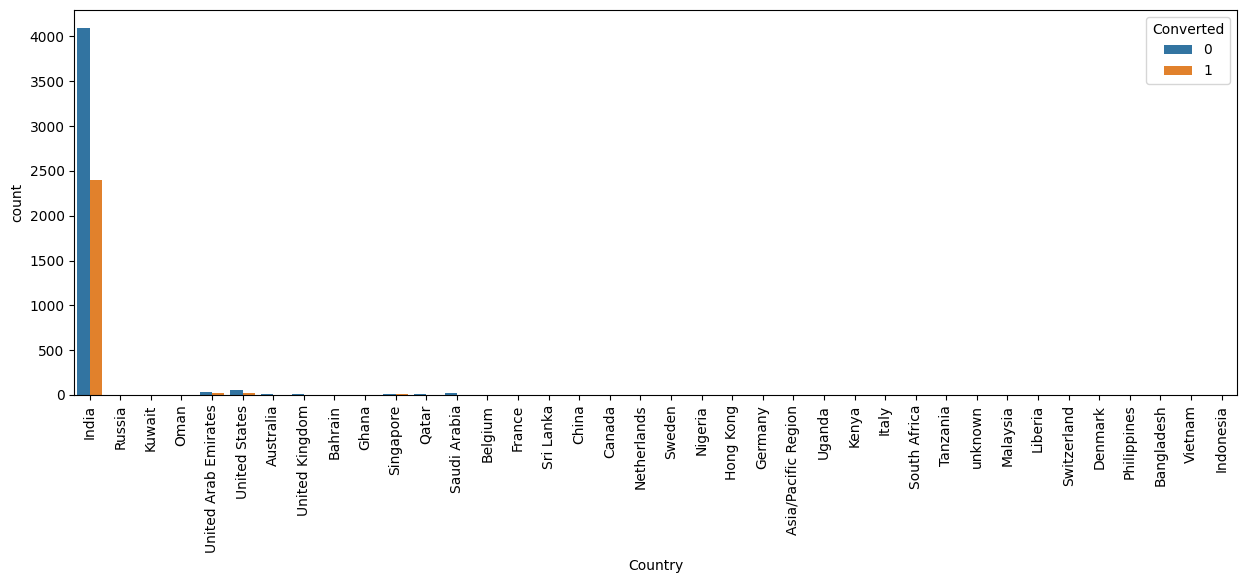

In [ ]:
#plotting spread of Country columnn

plt.figure(figsize=(15,5))
s1=sns.countplot(x=df.Country, y=None, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
# Checking the value count in percentages
df['Country'].value_counts(normalize= True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

As we can see the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped

In [ ]:
df = df.drop('Country', axis=1)

In [ ]:
# Lets check the null values again
null_values(df)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Last Activity                             1.11
Lead Source                               0.39
Lead Origin                               0.00
X Education Forums                        0.00
A free copy of Mastering The Interview    0.00
City                                      0.00
Tags                                      0.00
Through Recommendations                   0.00
Digital Advertisement                     0.00
Newspaper                                 0.00
What is your current occupation           0.00
Newspaper Article                         0.00
Search                                    0.00
Specialization                            0.00
Total Time Spent on Website               0.00
Converted                                 0.00
Do Not Call                               0.00
Do Not Email                              0.00
Last Notable Activity                     0.00
dtype: float6

In [ ]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
df = df.dropna()

In [ ]:
# Lets check the null values after changes made
null_values(df)

Lead Origin                               0.0
Search                                    0.0
A free copy of Mastering The Interview    0.0
City                                      0.0
Tags                                      0.0
Through Recommendations                   0.0
Digital Advertisement                     0.0
Newspaper                                 0.0
X Education Forums                        0.0
Newspaper Article                         0.0
What is your current occupation           0.0
Lead Source                               0.0
Specialization                            0.0
Last Activity                             0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Call                               0.0
Do Not Email                              0.0
Last Notable Activity                     0.0
dtype: float64

Now we don't have any missing values

In [ ]:
# To familiarize all the categorical values
for column in df:
    print(df[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
----------------------------------------------------------------------------------------
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
----------------------------------------------------------------------------------------
No     8358
Yes     716
Name: Do Not Email, dtype: int64
---------------------------

# Step 4: Data Visualization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Do Not Call                             9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Specialization                          9074 non-null   object 
 10  What is your current occupation         9074 non-null   obje

In [ ]:
# Checking the unique values count in each columns of df
df.nunique().sort_values(ascending = True)

Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
Through Recommendations                      2
Digital Advertisement                        2
Newspaper                                    2
X Education Forums                           2
Newspaper Article                            2
A free copy of Mastering The Interview       2
Search                                       2
Lead Origin                                  4
City                                         6
What is your current occupation              6
Specialization                              11
Last Notable Activity                       16
Last Activity                               17
Lead Source                                 21
Tags                                        27
TotalVisits                                 41
Page Views Per Visit                       114
Total Time Spent on Website               1717
dtype: int64

In [ ]:
# Function for percentage plots
def percent_plot(column_name):
    values = (df[column_name].value_counts(normalize=True)*100)
    plt_p = values.plot.bar(color=sns.color_palette('deep'))
    plt_p.set(xlabel = column_name, ylabel = '% in dataset')

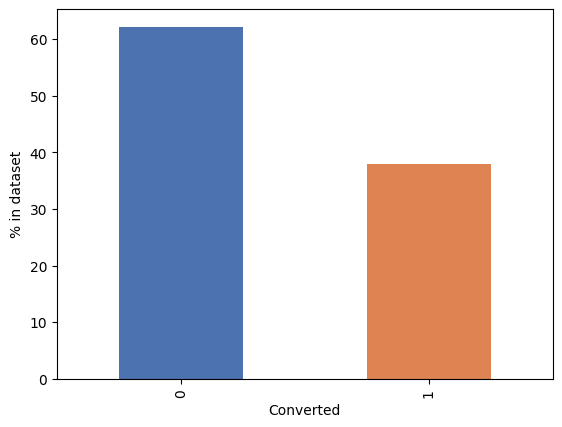

In [ ]:
percent_plot('Converted')

In [ ]:
# Convertion percentage
(sum(df['Converted'])/len(df['Converted'].index))*100

37.85541106458012

Inference

In the data frame 37.8% of the leads are converted. This means we have enough data of converted leads for modelling.

# 4.1 Visualising Categorical Variables

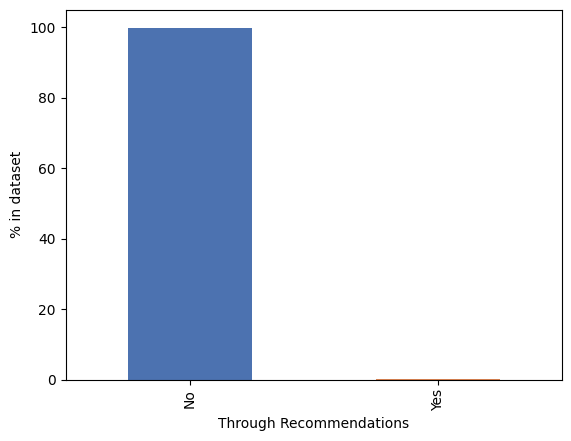

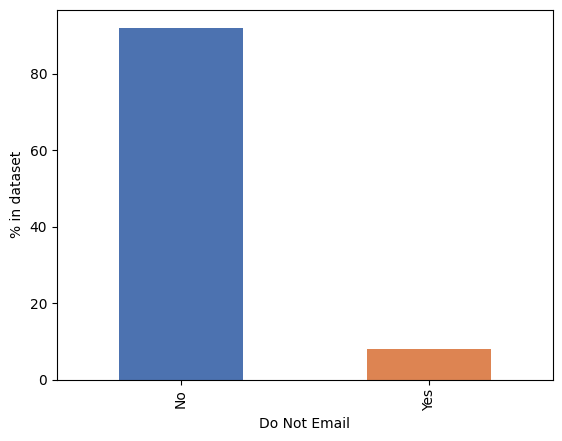

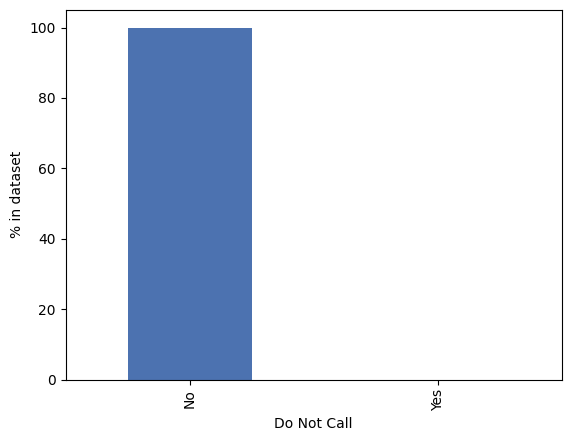

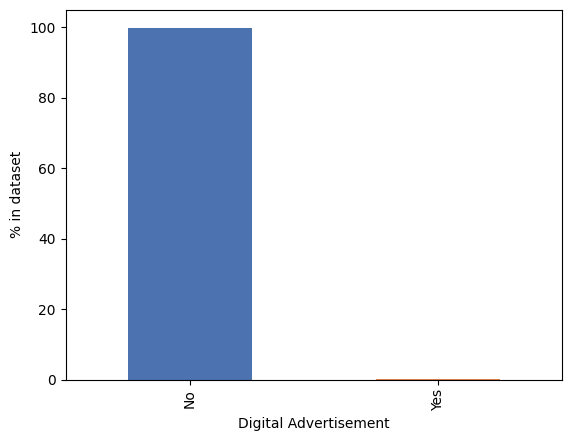

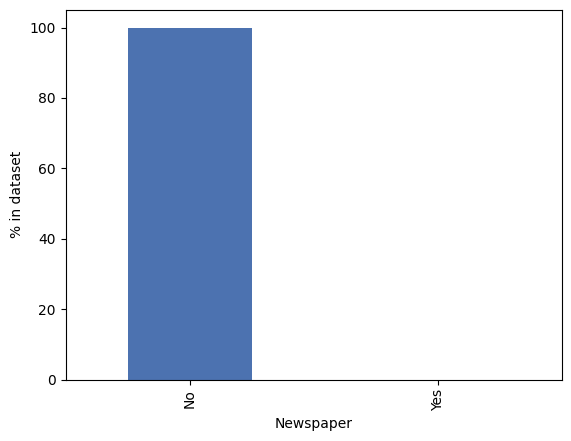

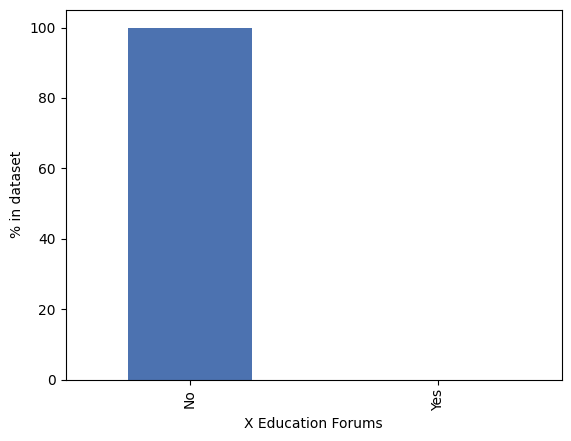

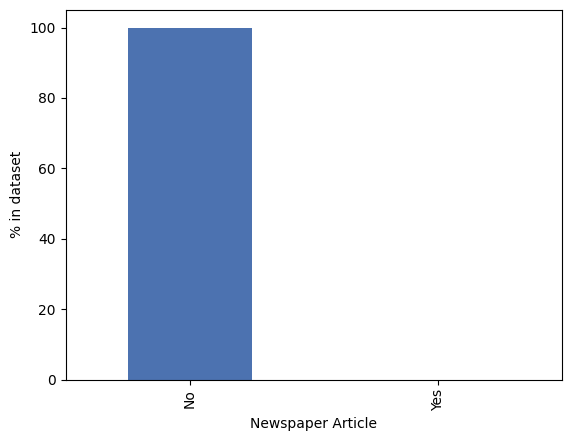

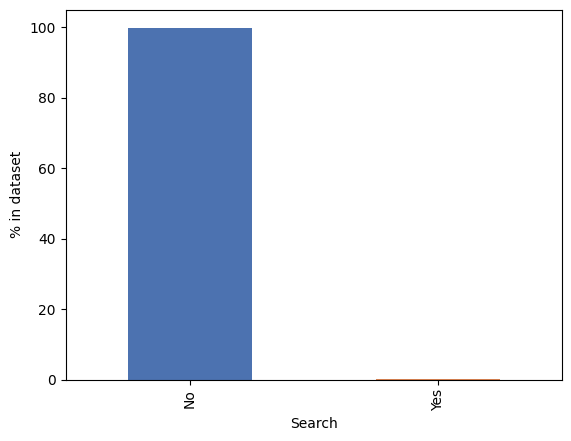

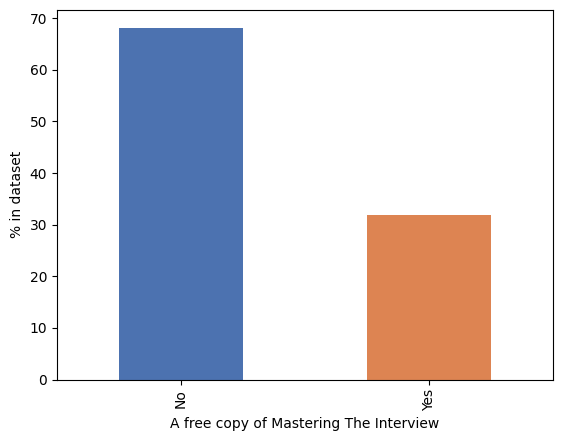

In [ ]:
# Checking the binarry columns(Yes/No) first
bin_cols = ["Through Recommendations", "Do Not Email", "Do Not Call", "Digital Advertisement", "Newspaper", "X Education Forums", "Newspaper Article", "Search", "A free copy of Mastering The Interview"]

for cols in bin_cols:
    percent_plot(cols)
    plt.show()

Most of these variables are insignificant in analysis as many of them only have one significant category 'NO'. And we can see only Do Not Email & A free copy of Mastering The Interview are having some significant values in it. So will remove the balnce columns.

In [ ]:
# Droping the insignificant columns

df = df.drop(["Through Recommendations","Do Not Call", "Digital Advertisement", "Newspaper", "X Education Forums", "Newspaper Article", "Search"],1)

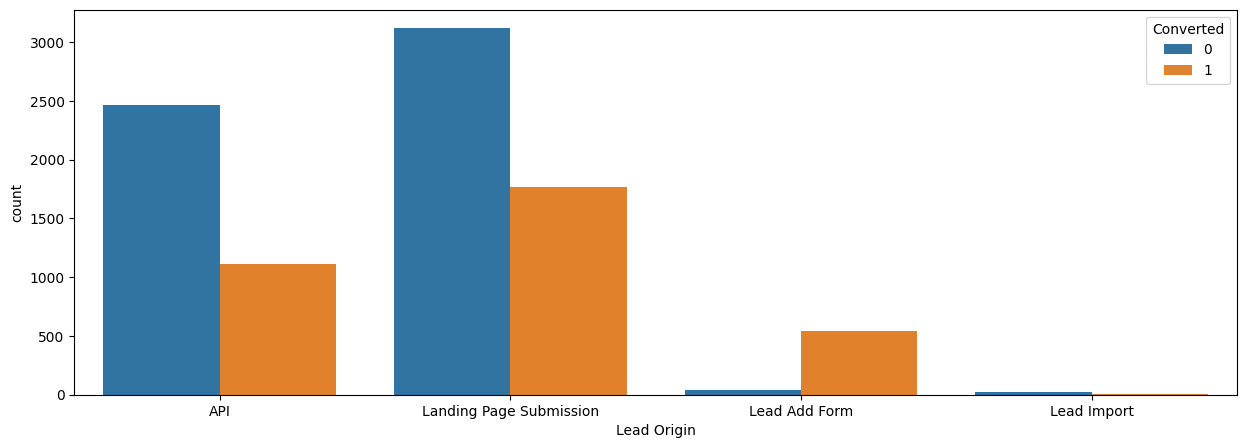

In [ ]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
sns.countplot(x=df['Lead Origin'], y= None, hue=df.Converted)
plt.show()

### Inference
API and Landing Page Submission bring higher number.

Lead Add Form has a very high conversion rate but count of leads are not very high.

Lead Import and Quick Add Form get very few leads.

In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

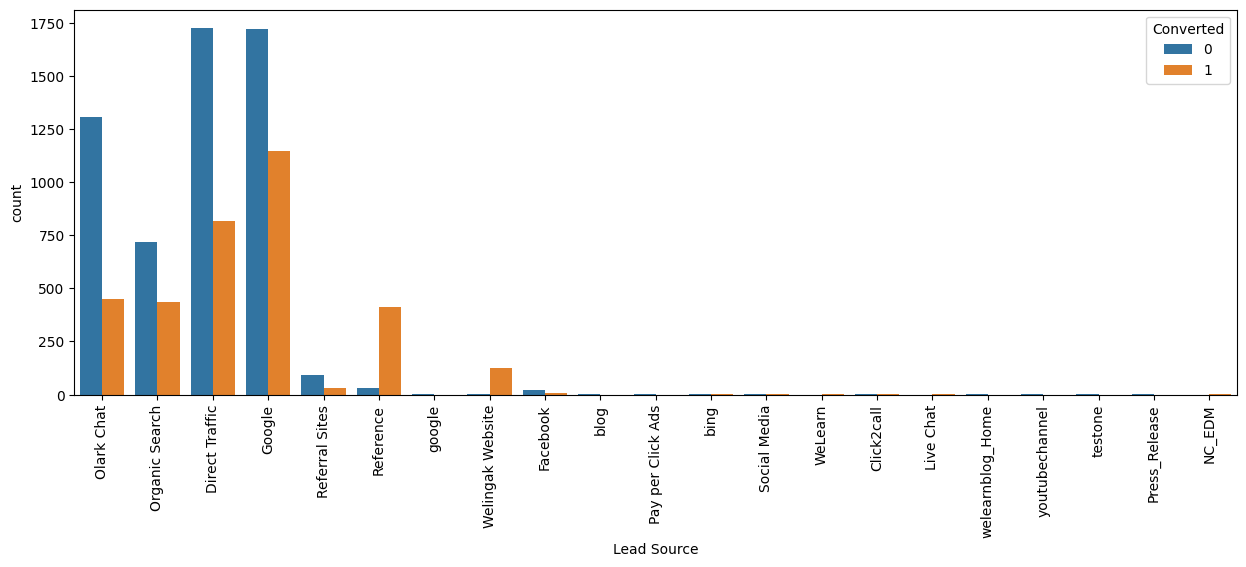

In [ ]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x=df['Lead Source'], y= None, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
# Combining low frequency values in Lead Source
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')

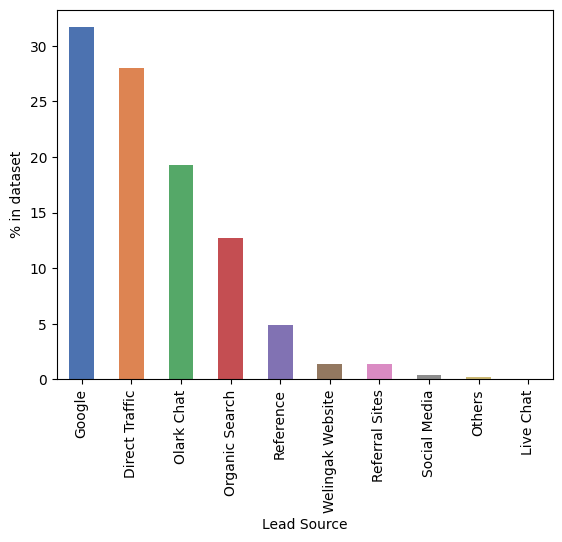

In [ ]:
percent_plot('Lead Source')

Inference

* Maximum number of leads are generated by Google and Direct traffic.
* Conversion Rate of reference leads and leads through welingak website is high.
* To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

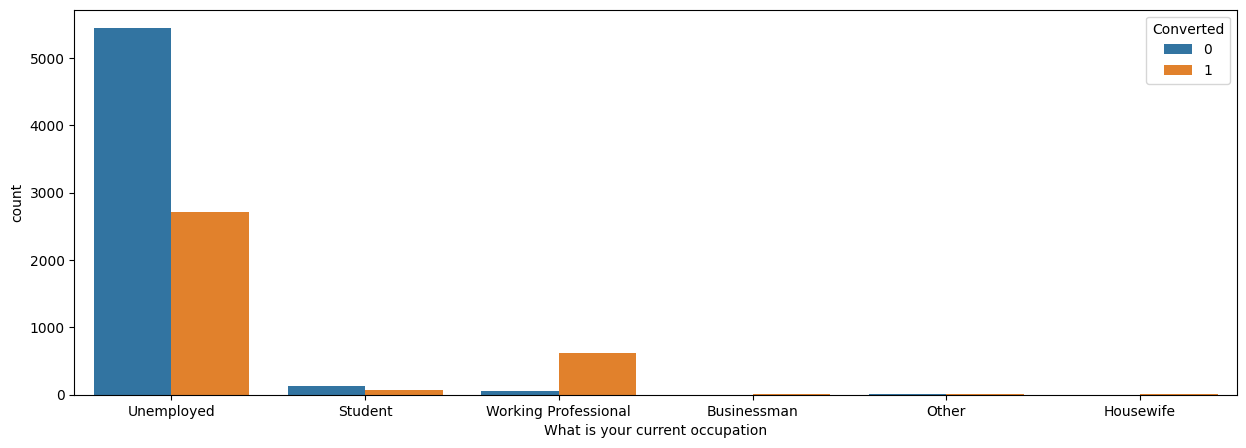

In [ ]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
sns.countplot(x=df['What is your current occupation'], y= None, hue=df.Converted)
plt.show()

Working Professionals going for the course have high chances of joining it.

Unemployed leads are the most in terms of Absolute numbers.

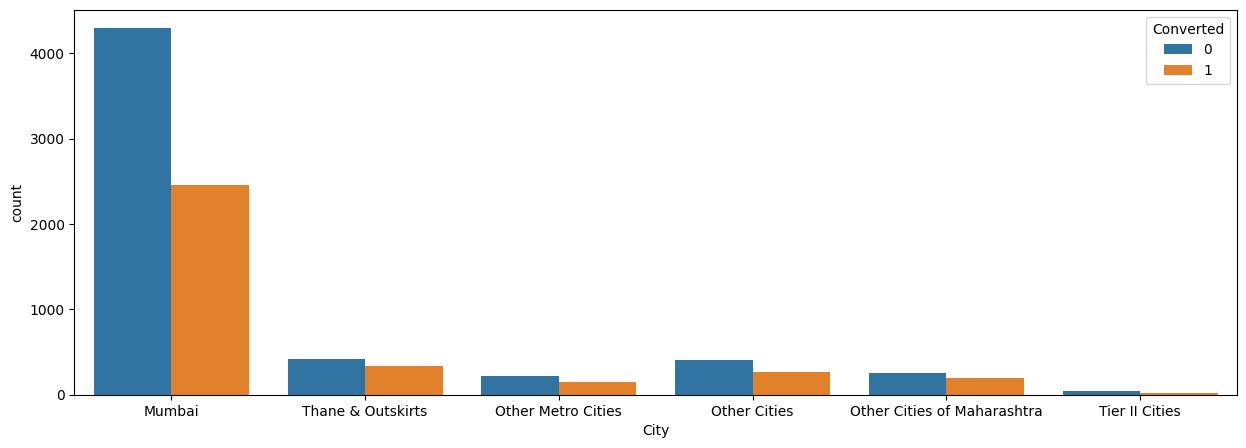

In [ ]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(15,5))
s1=sns.countplot(x=df.City, y= None, hue=df.Converted)
plt.show()

In City, most of the leads are generated for 'Mumbai'.

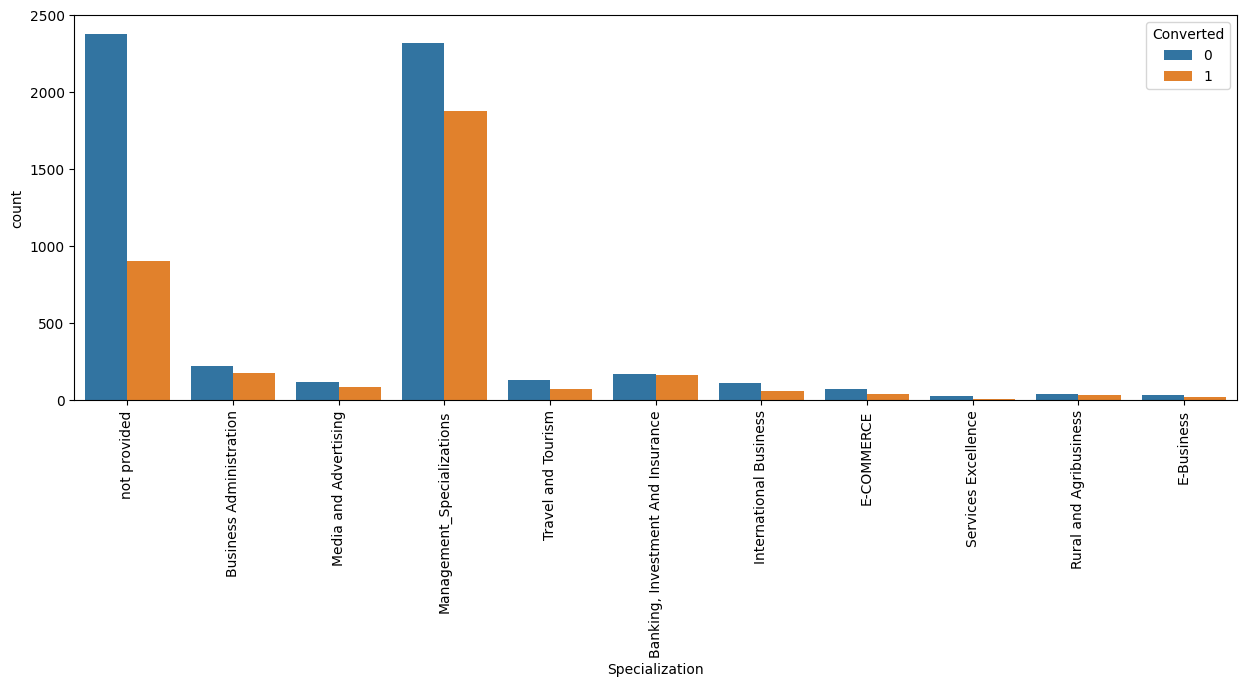

In [ ]:
#plotting spread of Specialization columnn after converting

plt.figure(figsize=(15,5))
s1=sns.countplot(x=df.Specialization, y= None, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Most of them are looking into the management specialization.

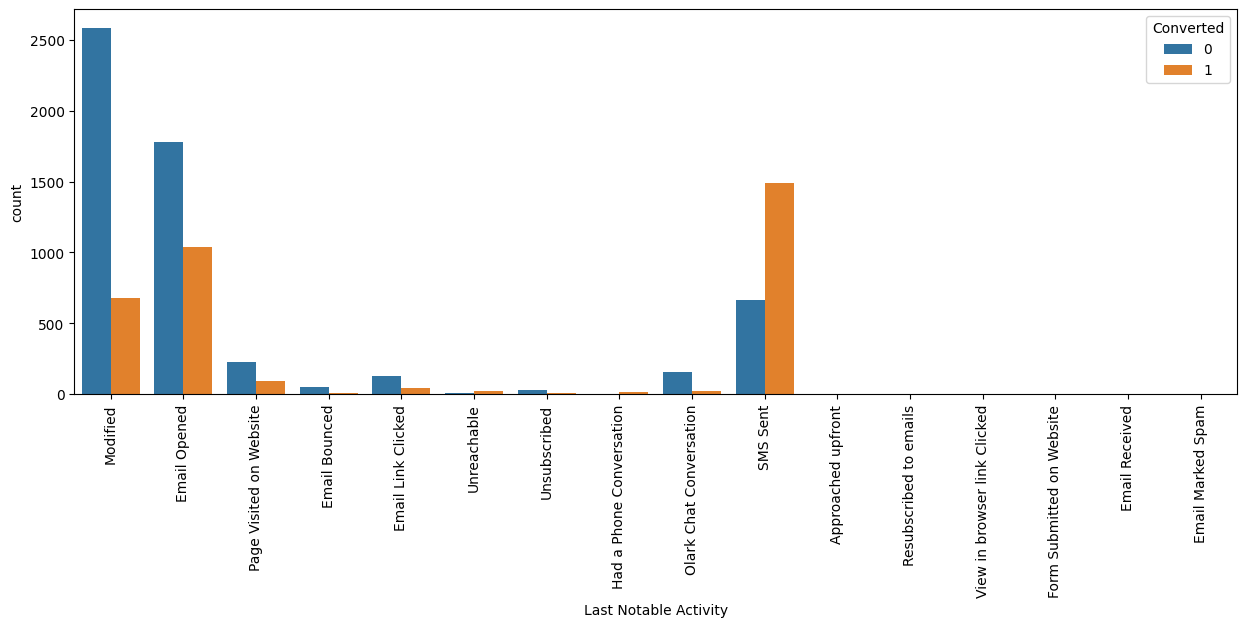

In [ ]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x=df['Last Notable Activity'], y= None, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
# Grouping the lower frequency values as "Other_Notable_activity"

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Unreachable','Unsubscribed',
                                                                         'Email Bounced','Resubscribed to emails','View in browser link Clicked',
                                                                         'Approached upfront','Form Submitted on Website','Email Received'],
                                                                        'Other_Notable_activity')

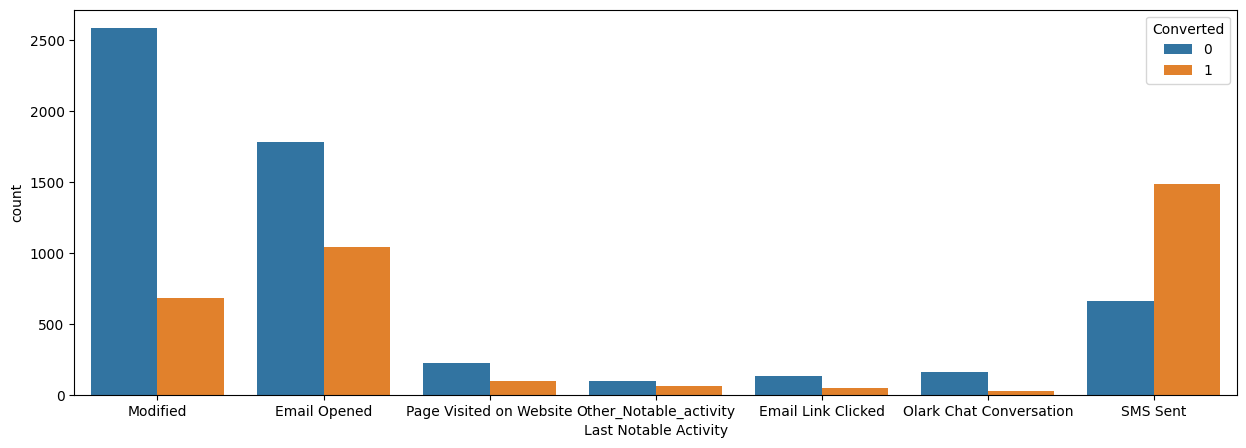

In [ ]:
#visualizing after the changes made

plt.figure(figsize=(15,5))
sns.countplot(x=df['Last Notable Activity'], y= None, hue=df.Converted)
plt.show()

Most generated leads for the category 'Modified' & most conversion rates in 'SMS Sent' and 'Email Opened'activities.

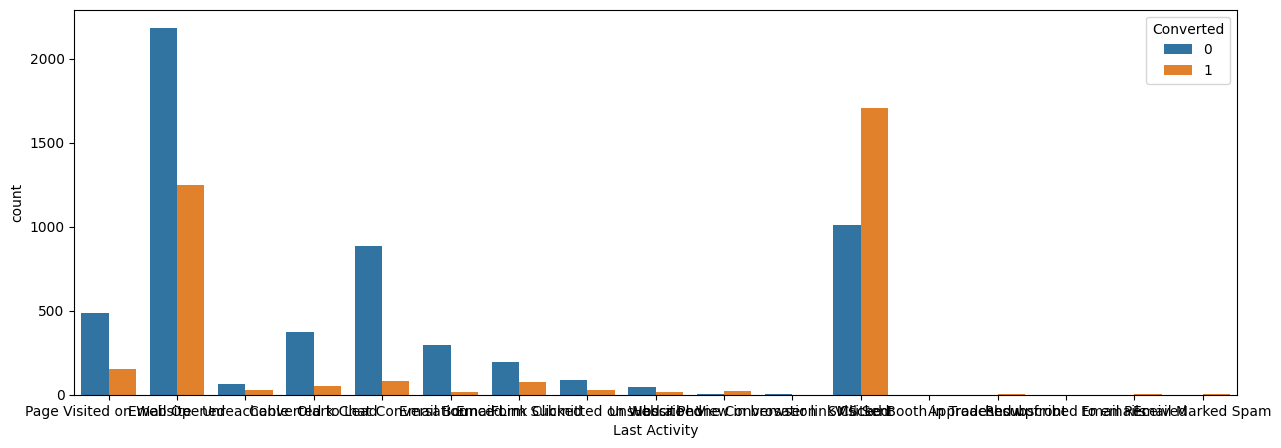

In [ ]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
sns.countplot(x=df['Last Activity'], y= None, hue=df.Converted)
plt.show()

In [ ]:
# Combining low frequency values in Others

df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation', 'Approached upfront',
                                                   'View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails',
                                                   'Visited Booth in Tradeshow'],'Others')

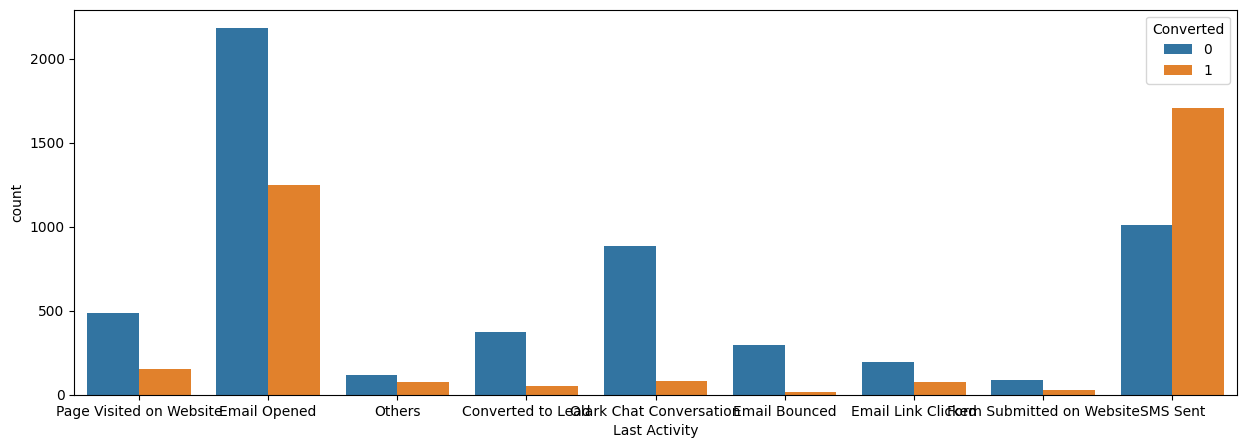

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['Last Activity'], y= None, hue=df.Converted)
plt.show()

Leads are generated where the last activity is 'Email Opened' while maximum conversion rate is for the activity of 'SMS Sent'.



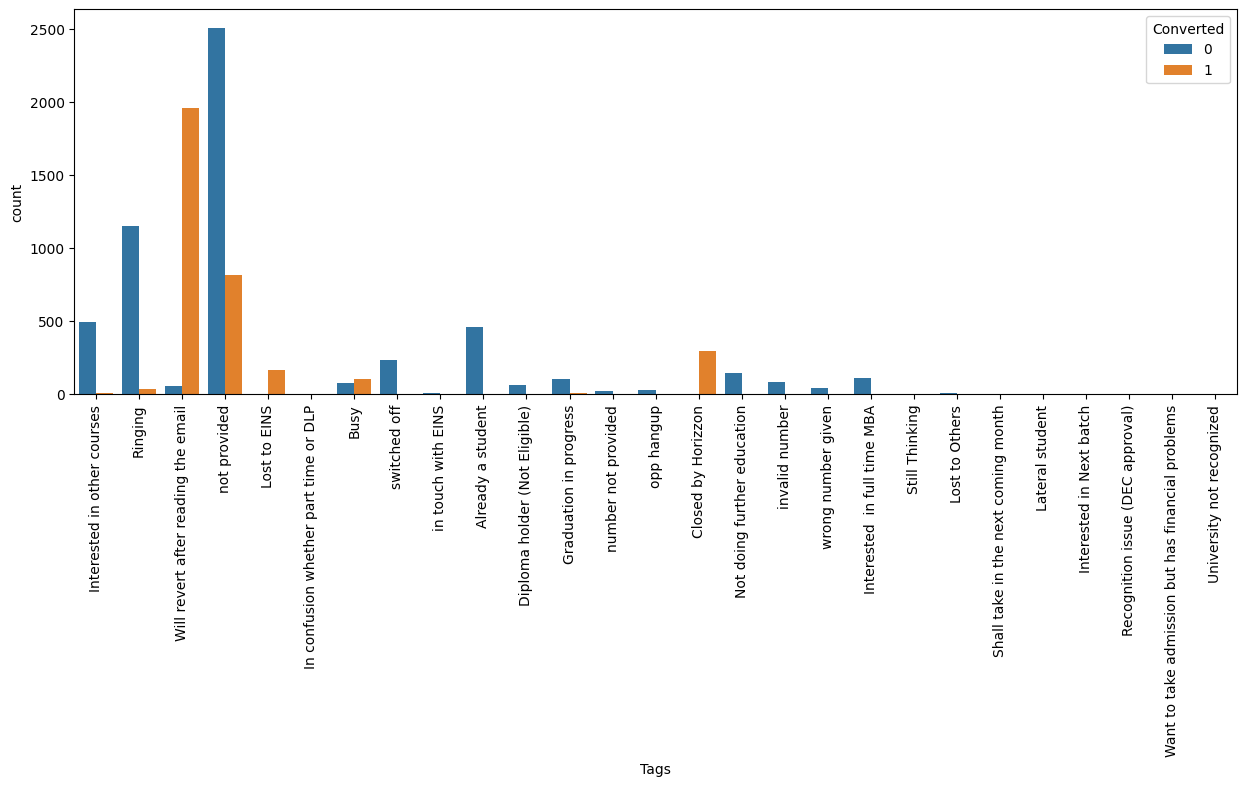

In [ ]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x=df['Tags'], y= None, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
#replacing tags with low frequency with "Other Tags"

df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education','invalid number',
                                    'wrong number given','Interested  in full time MBA'], 'Other_Tags')



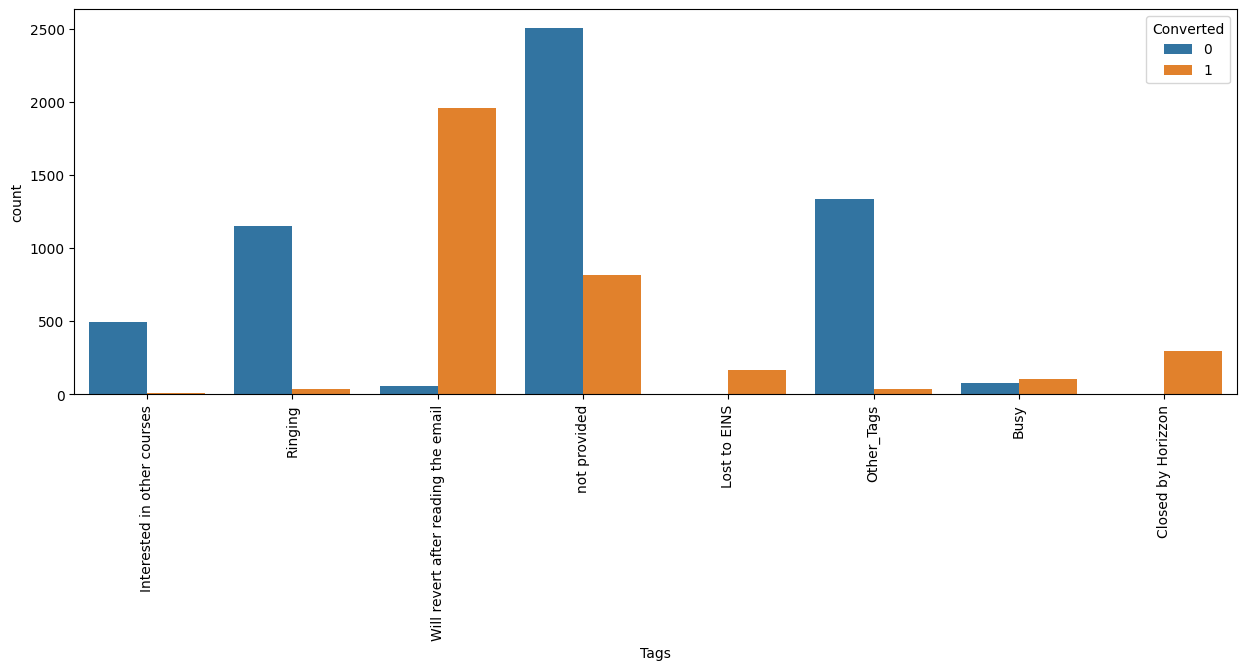

In [ ]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x=df['Tags'], y= None, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

The highest conversion rate are  'Will revert after reading the email'.

# 4.2 Visualising Numerical Variables and Outlier Treatment

In [ ]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


In [ ]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
90%,1.000000,7.000000,1373.000000,5.000000
95%,1.000000,10.000000,1557.000000,6.000000
99%,1.000000,17.000000,1839.000000,9.000000


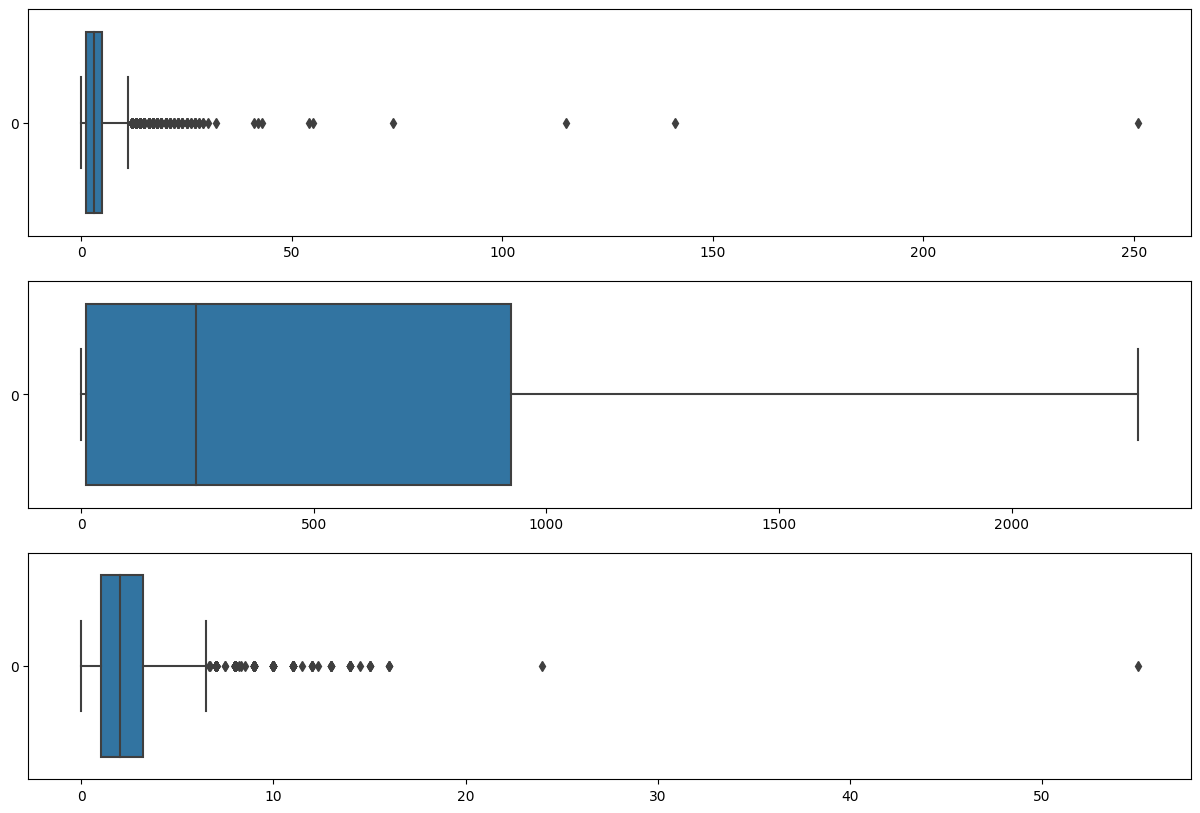

In [ ]:
# Plot Boxplots to verify
num_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(df[var],orient='h')
plt.show()

we can see that there are outliers present in the variables.

* In 'TotalVisits', the 95% quantile is 10 whereas the maximum value is 251. Hence, we should cap these outliers at 95% value.
* There are no significant outliers in 'Total Time Spent on Website'
* In 'Page Views Per Visit', similar to 'TotalVisits', we should cap outliers at 95% value.

In [ ]:
# Outlier Treatment:
# Craeting a function to remove top & bottom 1% of the Column Outlier values

def remove_outliers(data, column):
    # Calculate threshold values
    lower_threshold = data[column].quantile(0.01)
    upper_threshold = data[column].quantile(0.99)

    # Filter outliers
    filtered_data = data[(data[column] >= lower_threshold) & (data[column] <= upper_threshold)]

    return filtered_data

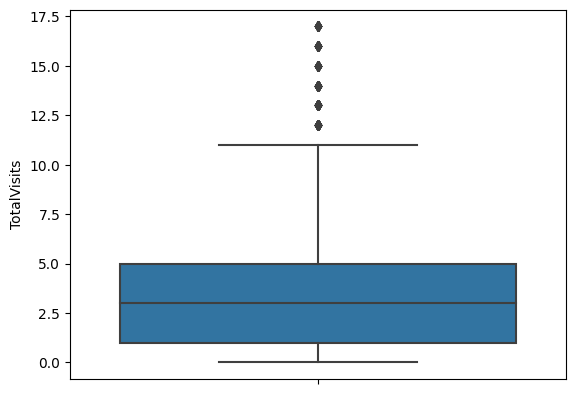

In [ ]:
# Outlier Treatment for column TotalVisits
df = remove_outliers(df, 'TotalVisits')
sns.boxplot(y=df['TotalVisits'],orient='h')
plt.show()

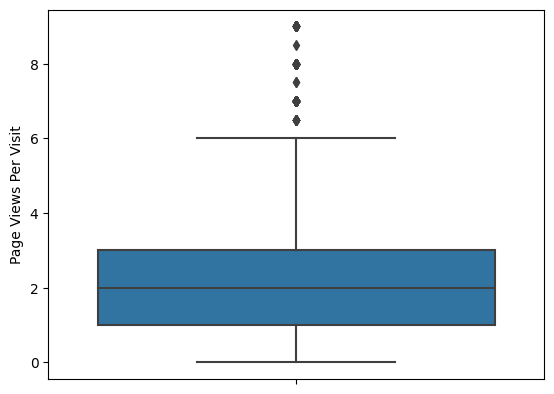

In [ ]:
# Outlier Treatment for column Page Views Per Visit
df = remove_outliers(df, 'Page Views Per Visit')
sns.boxplot(y=df['Page Views Per Visit'],orient='h')
plt.show()

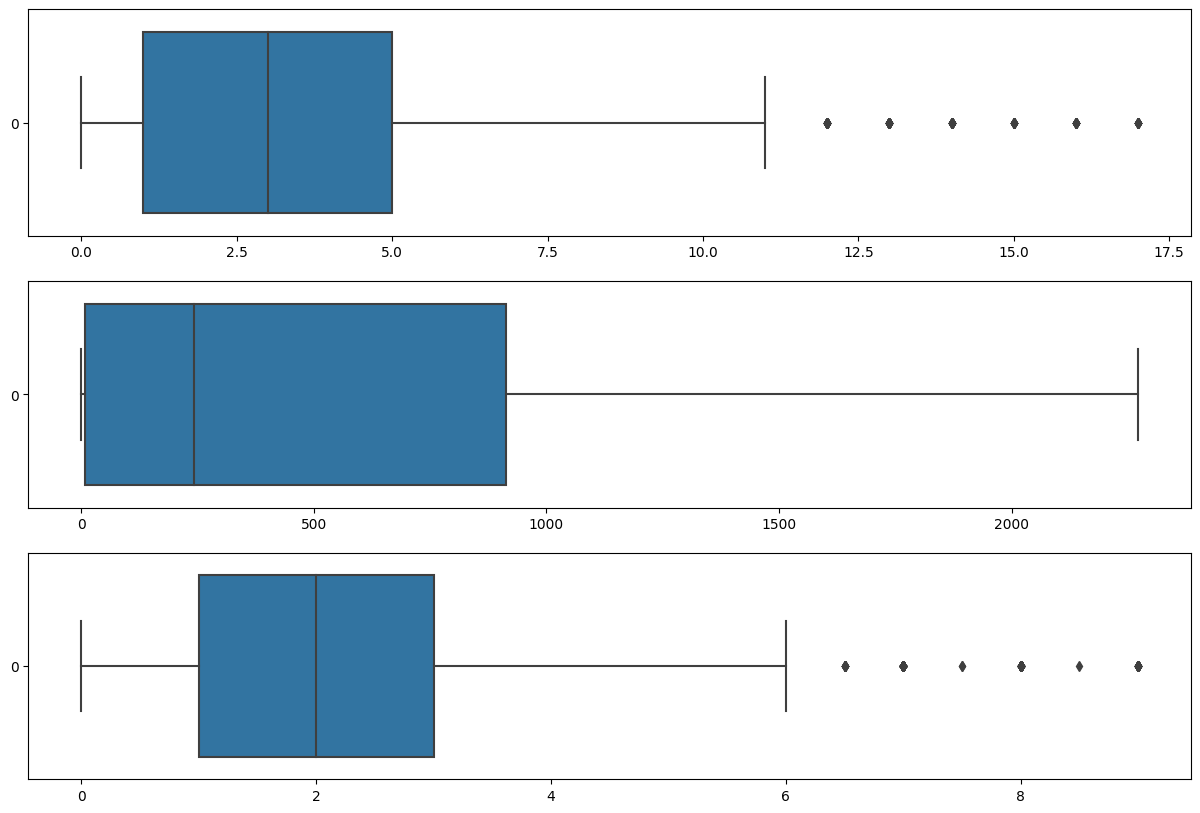

In [ ]:
# Plot Boxplots to verify after the changes
num_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(df[var],orient='h')
plt.show()

# Step 5: Dummy Variable creation

In [ ]:
#List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

For categorical variables with multiple levels, we create dummy features (one-hot encoded)

In [ ]:
# Categorical variables
cat_var = list(df.columns[df.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'Last Notable Activity']

In [ ]:
# To create dummy variables and drop first ones
dummy = pd.get_dummies(df[cat_var], drop_first=True)

# To add result to the original dataframe
df = pd.concat([df, dummy], axis=1)

# To drop the original variables
df = df.drop(cat_var,1)

In [ ]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


# Step 6: Train-Test Split

In [ ]:
# Importing required package
from sklearn.model_selection import train_test_split

In [ ]:
# Putting response variable to y
y = df['Converted']

# To put feature variable to X
X=df.drop('Converted', axis=1)
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step 7: Feature Scaling

In [ ]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
6676,-0.285584,-0.049636,1.395668,0.395289,-0.669212,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
6138,-0.285584,0.297929,0.609686,0.926758,-0.669212,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8650,-0.285584,-0.049636,1.178657,0.395289,1.494296,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3423,-0.285584,-1.092332,-0.878390,-1.199117,-0.669212,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6552,-0.285584,-1.092332,-0.878390,-1.199117,-0.669212,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# To check the conversion rate
conversion = (sum(df['Converted'])/len(df['Converted'].index))*100
conversion

37.75212909009413

We have 37.85% conversion rate in the final df.

# Step 8: Model Building

## 8.1 Feature Selection using RFE

In [ ]:
# To create an instance of Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

# To check output of RFE
rfe.support_

array([False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False,  True,
        True, False, False,  True])

In [ ]:
# Features that have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 23),
 ('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('A free copy of Mastering The Interview', False, 38),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 13),
 ('Lead Source_Google', False, 31),
 ('Lead Source_Live Chat', False, 43),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 40),
 ('Lead Source_Others', False, 27),
 ('Lead Source_Reference', False, 26),
 ('Lead Source_Referral Sites', False, 10),
 ('Lead Source_Social Media', False, 28),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 33),
 ('Last Activity_Email Opened', False, 4),
 ('Last Activity_Form Submitted on Website', False, 7),
 ('Last Activity_Olark Chat Conversation', False, 11),
 ('Last Activity_Others', False, 5),
 ('Last Activity_Page Vi

In [ ]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [ ]:
# columns rejected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_

In [ ]:
import statsmodels.api as sm

# Function for building the model
def build_model(X,y):
    X_sm = sm.add_constant(X)    # To add a constant
    logm = sm.GLM(y, X_sm, family = sm.families.Binomial()).fit()    # To fit the model
    print(logm.summary())    # Summary of the model
    return X_sm, logm

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate Variance Inflation Factor (VIF)
def check_VIF(X_in):
    X = X_in.drop('const',1)    # As we don't need constant
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = "VIF", ascending = False)

In [ ]:
# Function to get predicted values on train set

def get_pred(X,logm):
    y_train_pred = logm.predict(X)
    y_train_pred = y_train_pred.values.reshape(-1)
    # To create a dataframe to store original and predicted values
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
    y_train_pred_final['Lead ID'] = y_train.index
    # Using default threshold of 0.5 for now
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final

In [ ]:
from sklearn import metrics

# Function to get confusion matrix and accuracy
def conf_mat(Converted,predicted):
    confusion = metrics.confusion_matrix(Converted, predicted )
    print("Confusion Matrix:")
    print(confusion)
    print("Training Accuracy: ", metrics.accuracy_score(Converted, predicted))
    return confusion

In [ ]:
# Function for calculating metric beyond accuracy
def other_metrics(confusion):
    TP = confusion[1,1]    # True positives
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives
    print("Sensitivity: ", TP / float(TP+FN))
    print("Specificity: ", TN / float(TN+FP))
    print("False postive rate - predicting the lead conversion when the lead does not convert: ", FP/ float(TN+FP))
    print("Positive predictive value: ", TP / float(TP+FP))
    print("Negative predictive value: ", TN / float(TN+FN))

## Model 1
Running the first model by using the features selected by RFE

In [ ]:
#BUILDING MODEL #1
X1, logm1 = build_model(X_train[col],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1240.1
Date:                Tue, 20 Jun 2023   Deviance:                       2480.3
Time:                        13:06:01   Pearson chi2:                 8.90e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6059
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [ ]:
# check VIFs (Variance Inflation Factors) of features to see if there's any multicollinearity present.
check_VIF(X1)

,Features,VIF
14,Last Notable Activity_SMS Sent,6.52
5,Last Activity_SMS Sent,6.36
12,Last Notable Activity_Modified,1.92
1,Lead Origin_Lead Add Form,1.77
11,Tags_Will revert after reading the email,1.60
2,Lead Source_Olark Chat,1.46
0,Total Time Spent on Website,1.44
3,Lead Source_Welingak Website,1.31
6,Tags_Closed by Horizzon,1.20
9,Tags_Other_Tags,1.18


* All of the features have p-value close to zero i.e. they all seem significant.

* Last Notable Activity_SMS Sent have high VIF value will drop this column too.

# Model 2

In [ ]:
col1 = col.drop('Last Notable Activity_SMS Sent',1)

# To rebuild the model
X2, logm2 = build_model(X_train[col1],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1244.7
Date:                Tue, 20 Jun 2023   Deviance:                       2489.4
Time:                        13:09:21   Pearson chi2:                 8.84e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6054
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [ ]:
# Check VIFs
check_VIF(X2)

,Features,VIF
1,Lead Origin_Lead Add Form,1.77
11,Tags_Will revert after reading the email,1.55
12,Last Notable Activity_Modified,1.55
5,Last Activity_SMS Sent,1.46
0,Total Time Spent on Website,1.44
2,Lead Source_Olark Chat,1.43
3,Lead Source_Welingak Website,1.31
6,Tags_Closed by Horizzon,1.20
9,Tags_Other_Tags,1.16
7,Tags_Interested in other courses,1.11


# Looking at Correlations

<Axes: >

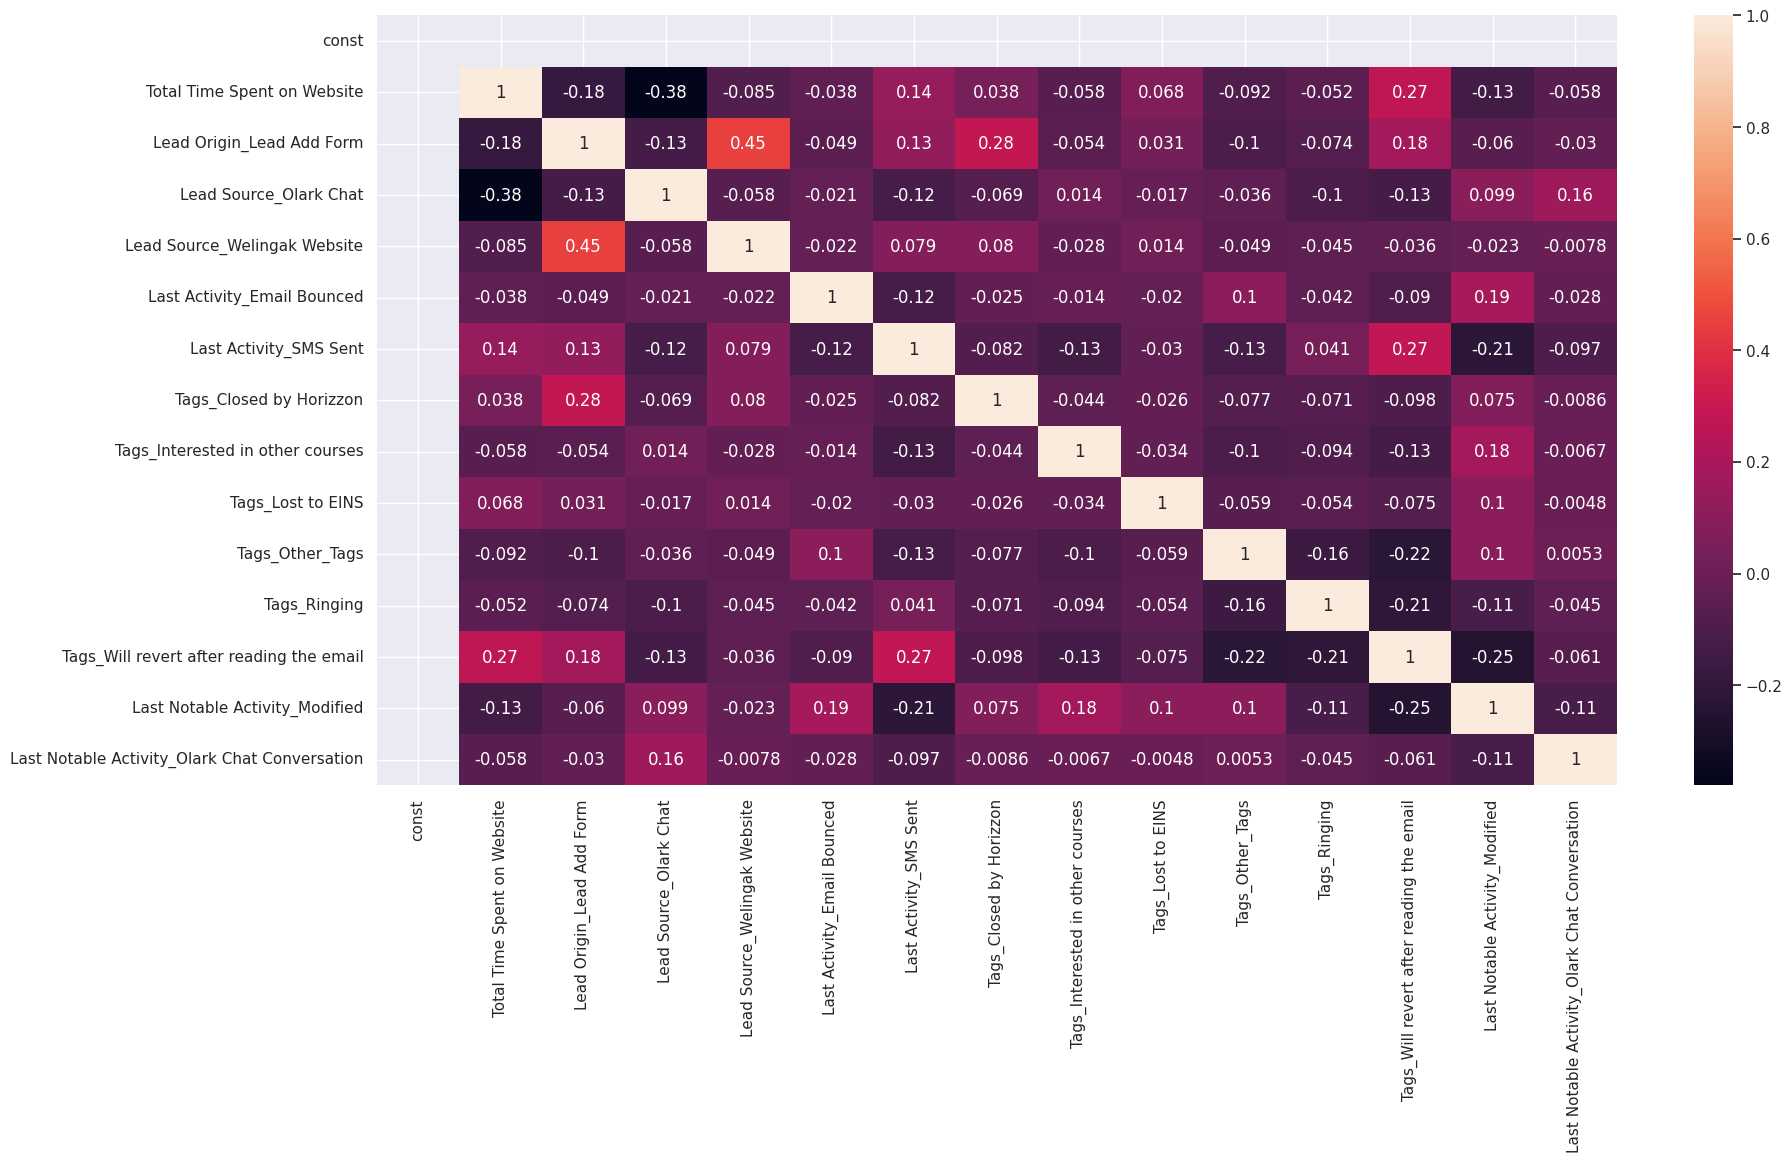

In [ ]:
# To plot correlations
plt.figure(figsize = (20,10))
sns.heatmap(X2.corr(),annot = True)

From VIF values and heat maps, we can see that there is not much multicollinearity present. All variables have a good value of VIF. These features seem important from the business aspect as well. So we need not drop any more variables and we can proceed with making predictions using this model only

In [ ]:
# To get predicted values on train set
y_train_pred_final = get_pred(X2,logm2)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted
0,1,0.988634,6676,1
1,1,0.996319,6138,1
2,1,0.985684,8650,1
3,0,0.048376,3423,0
4,0,0.223347,6552,0


In [ ]:
# Confusion Matrix and accuracy
confusion = conf_mat(y_train_pred_final.Converted,y_train_pred_final.predicted)

Confusion Matrix:
[[3701  170]
 [ 290 2085]]
Training Accuracy:  0.9263528658341339


Final Model :
* All p-values are very close to zero. VIFs for all features are very low.
* There is hardly any multicollinearity present.
* Training accuracy of 92.64% at a probability threshold of 0.05 is also very good.

# Metrics beyond simply Accuracy

In [ ]:
#calculating metric beyond accuracy
other_metrics(confusion)

Sensitivity:  0.8778947368421053
Specificity:  0.9560836993025058
False postive rate - predicting the lead conversion when the lead does not convert:  0.043916300697494186
Positive predictive value:  0.9246119733924612
Negative predictive value:  0.9273365071410674


# Plotting the ROC Curve

An ROC curve demonstrates several things:

*  It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
*  The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
*  The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [ ]:
# Function to plot ROC
def plot_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

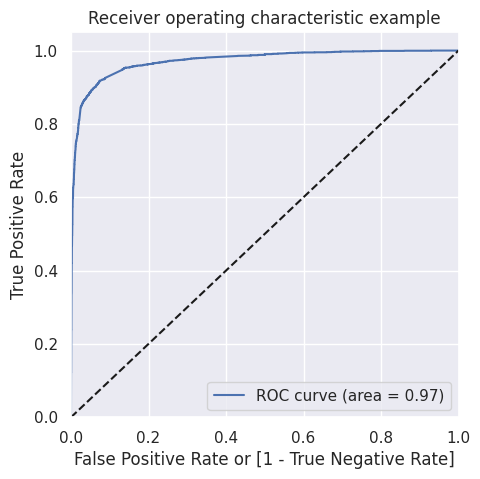

In [ ]:
# To plot ROC
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [ ]:
print("Area under curve: ", metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))

Area under curve:  0.9718675168934996


Area under curve (auc) is approximately 0.97 which is very close to ideal auc of 1.

# Finding Optimal Cutoff Point
Optimal cutoff probability is the prob where we get balanced sensitivity and specificity.

In [ ]:
# To create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.988634,6676,1,1,1,1,1,1,1,1,1,1,1
1,1,0.996319,6138,1,1,1,1,1,1,1,1,1,1,1
2,1,0.985684,8650,1,1,1,1,1,1,1,1,1,1,1
3,0,0.048376,3423,0,1,0,0,0,0,0,0,0,0,0
4,0,0.223347,6552,0,1,1,1,0,0,0,0,0,0,0


In [ ]:
# To calculate accuracy, sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1]    # True positive
# TN = confusion[0,0]    # True negatives
# FP = confusion[0,1]    # False positives
# FN = confusion[1,0]    # False negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380243  1.000000  0.000000
0.1   0.1  0.832533  0.971368  0.747352
0.2   0.2  0.896574  0.952000  0.862568
0.3   0.3  0.922030  0.914105  0.926892
0.4   0.4  0.923791  0.899368  0.938776
0.5   0.5  0.926353  0.877895  0.956084
0.6   0.6  0.927153  0.856842  0.970292
0.7   0.7  0.912424  0.802947  0.979592
0.8   0.8  0.901857  0.768000  0.983983
0.9   0.9  0.883926  0.711158  0.989925


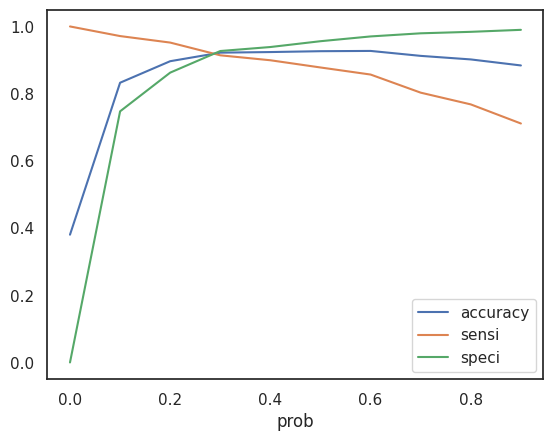

In [ ]:
# To plot accuracy, sensitivity and specificity for various probabilities
sns.set_style('white')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take as a cutoff probability

In [ ]:
# Using 0.3 threshold for predictions
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.988634,6676,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.996319,6138,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.985684,8650,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.048376,3423,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.223347,6552,0,1,1,1,0,0,0,0,0,0,0,0


In [ ]:
# Confusion matrix and Overall Accuracy
confusion2 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

Confusion Matrix:
[[3588  283]
 [ 204 2171]]
Training Accuracy:  0.9220300992635286


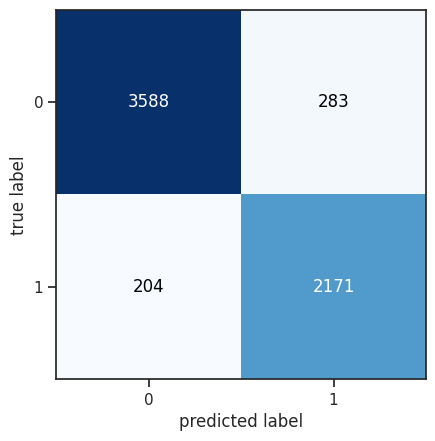

In [ ]:
# To plot confusion matrix
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion2)
plt.show()

In [ ]:
# Other metrics
other_metrics(confusion2)

Sensitivity:  0.9141052631578948
Specificity:  0.9268922758977008
False postive rate - predicting the lead conversion when the lead does not convert:  0.07310772410229915
Positive predictive value:  0.884678076609617
Negative predictive value:  0.9462025316455697


# Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3871
           1       0.88      0.91      0.90      2375

    accuracy                           0.92      6246
   macro avg       0.92      0.92      0.92      6246
weighted avg       0.92      0.92      0.92      6246



# Precision and Recall Tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6241    1
 6242    1
 6243    0
 6244    0
 6245    0
 Name: Converted, Length: 6246, dtype: int64,
 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6241    1
 6242    1
 6243    0
 6244    0
 6245    0
 Name: predicted, Length: 6246, dtype: int64)

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


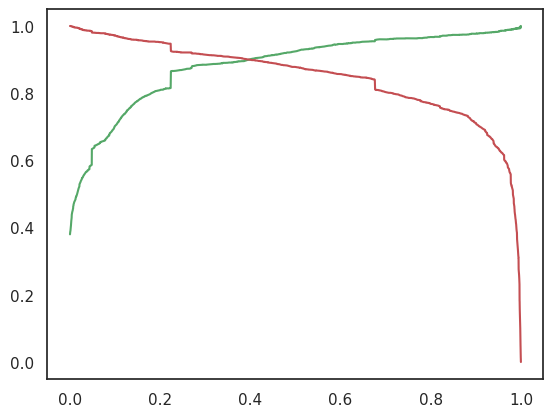

In [ ]:
# To plot precision vs recall for different thresholds
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From the curve above, 0.4 is the optimum point to take as a cutoff probability using Precision-Recall. We can check our accuracy using this cutoff too.

In [ ]:
# Using 0.4 threshold for predictions
y_train_pred_final['final_predicted_pr'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,1,0.988634,6676,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.996319,6138,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.985684,8650,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.048376,3423,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.223347,6552,0,1,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Confusion matrix and overall accuracy
confusion3 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted_pr)

Confusion Matrix:
[[3634  237]
 [ 239 2136]]
Training Accuracy:  0.9237912263848863


In [ ]:
# Other metrics
other_metrics(confusion3)

Sensitivity:  0.8993684210526316
Specificity:  0.9387755102040817
False postive rate - predicting the lead conversion when the lead does not convert:  0.061224489795918366
Positive predictive value:  0.900126422250316
Negative predictive value:  0.938290730699716


Accuracy and other metrics yield similar values for both the cutoffs.

# Making Predictions on the Test Set

In [ ]:
# Feature transform on Test set
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7625,-0.297688,-0.397342,2.145058,-0.164140,1.446506,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
5207,-0.297688,0.277837,0.772700,0.876565,1.446506,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2390,-0.297688,-1.072521,-0.885722,-1.204846,-0.691321,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4362,-0.297688,-0.397342,-0.451952,-0.164140,-0.691321,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1023,-0.297688,3.991321,-0.293028,1.396918,-0.691321,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# To get final features
X_test_sm = X_test[col1]
# To add a constant
X_test_sm = sm.add_constant(X_test_sm)
# Making predictions
y_test_pred = logm2.predict(X_test_sm)

y_test_pred[:10]

7625    0.139377
5207    0.978003
2390    0.996789
4362    0.025761
1023    0.021559
8226    0.990071
3079    0.143802
530     0.012537
7873    0.048014
5146    0.997941
dtype: float64

In [ ]:
# To convert y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
7625,0.139377
5207,0.978003
2390,0.996789
4362,0.025761
1023,0.021559


In [ ]:
# To convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Lead ID to index
y_test_df['Lead ID'] = y_test_df.index

In [ ]:
# To remove index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# To append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Lead ID,Converted_prob
0,0,7625,0.139377
1,1,5207,0.978003
2,1,2390,0.996789
3,0,4362,0.025761
4,0,1023,0.021559


In [ ]:
# To put the threshold of 0.2 as derived
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

y_pred_final.head()


,Converted,Lead ID,Converted_prob,final_predicted
0,0,7625,0.139377,0
1,1,5207,0.978003,1
2,1,2390,0.996789,1
3,0,4362,0.025761,0
4,0,1023,0.021559,0


In [ ]:
print("Area under curve: ", metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Converted_prob))

Area under curve:  0.9746755473458326


In [ ]:
# Confusion matrix and overall accuracy
confusion_test = conf_mat(y_pred_final.Converted,y_pred_final.final_predicted)

Confusion Matrix:
[[1439  245]
 [  47  947]]
Training Accuracy:  0.8909634055265123


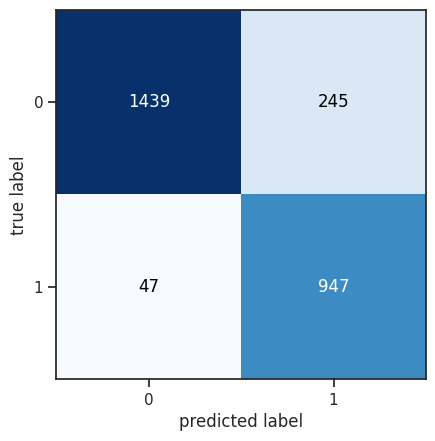

In [ ]:
# To plot confusion matrix
plot_confusion_matrix(conf_mat=confusion_test)
plt.show()

In [ ]:
# Other metrics
other_metrics(confusion_test)

Sensitivity:  0.9527162977867203
Specificity:  0.8545130641330166
False postive rate - predicting the lead conversion when the lead does not convert:  0.14548693586698339
Positive predictive value:  0.7944630872483222
Negative predictive value:  0.968371467025572


# Classification Report

In [ ]:
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1684
           1       0.79      0.95      0.87       994

    accuracy                           0.89      2678
   macro avg       0.88      0.90      0.89      2678
weighted avg       0.90      0.89      0.89      2678



# Determining Feature Importance

In [ ]:
# To display features with corrsponding coefficients in final model
pd.options.display.float_format = '{:.2f}'.format
new_params = logm2.params[1:]
new_params

Total Time Spent on Website                      1.08
Lead Origin_Lead Add Form                        1.75
Lead Source_Olark Chat                           1.23
Lead Source_Welingak Website                     3.47
Last Activity_Email Bounced                     -1.40
Last Activity_SMS Sent                           1.98
Tags_Closed by Horizzon                          6.59
Tags_Interested in other courses                -1.96
Tags_Lost to EINS                                5.49
Tags_Other_Tags                                 -2.60
Tags_Ringing                                    -3.59
Tags_Will revert after reading the email         4.50
Last Notable Activity_Modified                  -1.73
Last Notable Activity_Olark Chat Conversation   -1.85
dtype: float64

Feature importance scores can provide insight into the dataset. The relative scores can highlight which features may be most relevant to the target, and the converse, which features are the least relevant.

In [ ]:
# Relative feature importance
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Total Time Spent on Website                      16.35
Lead Origin_Lead Add Form                        26.53
Lead Source_Olark Chat                           18.74
Lead Source_Welingak Website                     52.67
Last Activity_Email Bounced                     -21.21
Last Activity_SMS Sent                           30.08
Tags_Closed by Horizzon                         100.00
Tags_Interested in other courses                -29.82
Tags_Lost to EINS                                83.33
Tags_Other_Tags                                 -39.40
Tags_Ringing                                    -54.53
Tags_Will revert after reading the email         68.25
Last Notable Activity_Modified                  -26.30
Last Notable Activity_Olark Chat Conversation   -28.11
dtype: float64

In [ ]:
# To sort features based on importance
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Total Time Spent on Website                      10
Lead Origin_Lead Add Form                         9
Lead Source_Olark Chat                            7
Lead Source_Welingak Website                     13
Last Activity_Email Bounced                      12
Last Activity_SMS Sent                            4
Tags_Closed by Horizzon                           0
Tags_Interested in other courses                  2
Tags_Lost to EINS                                 1
Tags_Other_Tags                                   5
Tags_Ringing                                      3
Tags_Will revert after reading the email         11
Last Notable Activity_Modified                    8
Last Notable Activity_Olark Chat Conversation     6
dtype: int64

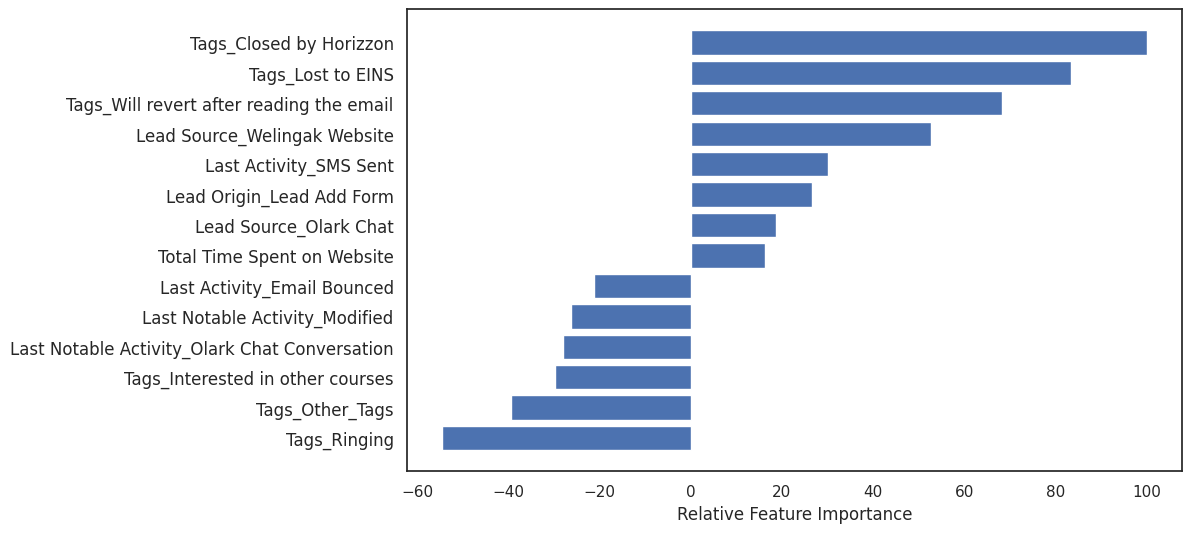

In [ ]:
# To plot features with their relative importance
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
pos = np.arange(sorted_idx.shape[0])
ax.barh(pos, feature_importance[sorted_idx])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col1].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=12)
plt.show()